# Data Mining and machine Learning 
# Experiment 6
## 12 February

# Name: Tufan Kundu
# Reg no.: 24MDT0184

## Performance measures: Cross validation

### Q1. Today we will try to perform cross validation to check how well the model generalizes to a unseen data. We will see how to implement K fold cross validation and stratified K fold cross validation.

In [97]:
## Loading the necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold,cross_val_score

In [99]:
## Loading the dataset

df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp6\liver_patient.csv")
df

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  liver_disease  
0        3.3                        0.90              1  
1        3.2                        0.74              1  
2        3.3                        0.89              1  
3        3.4                        1.00              1  
4        2.4                        0.40              1  
..       ...                         ...            ...  
578      1.6                        0.37              0  
579      3.2                        1.10              1  
580      3.2                        1.00              1  
581      3.4                        1.00              1  
582      4.4                        1.50              0  

[583 rows x 11 columns]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Dropping the unnecessary Age and Gender column

In [104]:
df.drop(['Age','Gender'],axis=1,inplace = True)

### Perform Min-Max scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df)

In [109]:
X

array([[0.00402145, 0.        , 0.06057645, ..., 0.52173913, 0.24      ,
        1.        ],
       [0.14075067, 0.2755102 , 0.31069858, ..., 0.5       , 0.176     ,
        1.        ],
       [0.0924933 , 0.20408163, 0.20859795, ..., 0.52173913, 0.236     ,
        1.        ],
       ...,
       [0.00536193, 0.00510204, 0.0889106 , ..., 0.5       , 0.28      ,
        1.        ],
       [0.01206434, 0.02040816, 0.05911089, ..., 0.54347826, 0.28      ,
        1.        ],
       [0.0080429 , 0.01020408, 0.07474353, ..., 0.76086957, 0.48      ,
        0.        ]])

In [111]:
x = X[:,:-1]
y = X[:,-1]

###  Do the train test split of the data with test size 20%

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

###  Fit the LogisticRegression model to the this training data.

In [117]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

## Print the accuracy which is also a performance measure as far as a classification problem is concerned with.
print(f"The accuracy of the model is:{round(accuracy_score(y_test,y_pred)*100,3)} %")

The accuracy of the model is:74.359 %


### Now import Kfold and cross val score functions from the available modules for performing Kfold cross validation.
###  Now you can create a new object of the class LogisticRegression as logisticR

In [120]:
logisticR = LogisticRegression()

## now let us perform the KFold class to split the data into 5 folds.
kfold_validation = KFold(n_splits = 5, shuffle = True, random_state=42)

### Now we will use cross val score function to perform the 5 fold cross validation and print the accuracy scores in each case.

In [123]:
result = cross_val_score(logisticR,x_train,y_train,scoring = 'accuracy',cv = kfold_validation)

print("Cross validation accuracy scores:", result)
print(f"Mean accuracy: {np.mean(result)*100}%")

Cross validation accuracy scores: [0.74468085 0.77419355 0.62365591 0.65591398 0.7311828 ]
Mean accuracy: 70.59254175245938%


### Now we can try how we can implement StratifiedKFold cross validation

In [126]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(logisticR,x_train,y_train,scoring = "accuracy",cv = skf)

print("Stratified Cross validation scores:",scores)
print(f"Mean accuracy: {scores.mean()*100}%")

Stratified Cross validation scores: [0.70212766 0.70967742 0.70967742 0.70967742 0.69892473]
Mean accuracy: 70.60169297643561%


## Performance measures: Confusion matrix, Precision, Recall, F1 score

## Q2. Now fit the logistic regression model for the liver patient data without performing cross validation with a train test split of 80:20.

In [130]:
model_new = LogisticRegression()
model_new.fit(x_train,y_train)
y_pred_new = model_new.predict(x_test)
## Print the accuracy which is also a performance measure as far as a classification problem is concerned with.
print(f"The accuracy of the model is:{round(accuracy_score(y_test,y_pred_new)*100,3)} %")

The accuracy of the model is:74.359 %


### we can also print the confusion matrix, precision and recall

In [133]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred_new)
print("Confusion matrix:\n",cm)

precision = precision_score(y_test,y_pred_new)
recall = recall_score(y_test,y_pred_new)
f1 = f1_score(y_test,y_pred_new)

print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)


Confusion matrix:
 [[ 0 30]
 [ 0 87]]
Precision: 0.7435897435897436
Recall: 1.0
F1 score: 0.8529411764705882


### The same confusion matrix if we want can be printed in a more better manner using the below code.

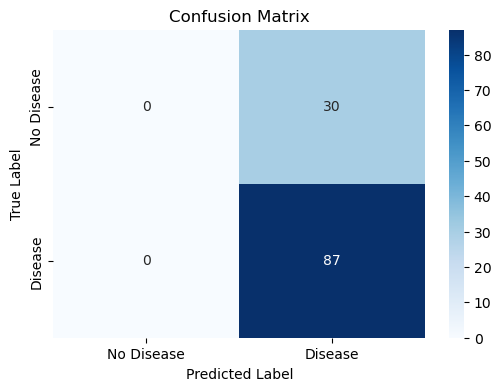

In [136]:
# Plot confusion matrix using seaborn heatmap import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease","Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Explore what is an ROC curve and AUC. And plot the same in the above problem.Mention what they specify in the above case.

## ROC stands for Receiver Operating Characteristic Curve

- The ROC curve is a graphical representation of a classification model's performance across different threshold values.

- It plots True Positive Rate (TPR) vs. False Positive Rate (FPR) at various threshold settings.

- The closer the ROC curve is to the top-left corner, the better the model.

## AUC stands for Area Under the Curve

- AUC is a numerical measure representing the area under the ROC curve.
Interpretation of AUC Score:
-    AUC = 1.0 → Perfect classifier
-   AUC = 0.5 → Random classifier (No discrimination ability)
-   AUC < 0.5 → Worse than random (Indicates issues with the model)

AUC Score: 0.774


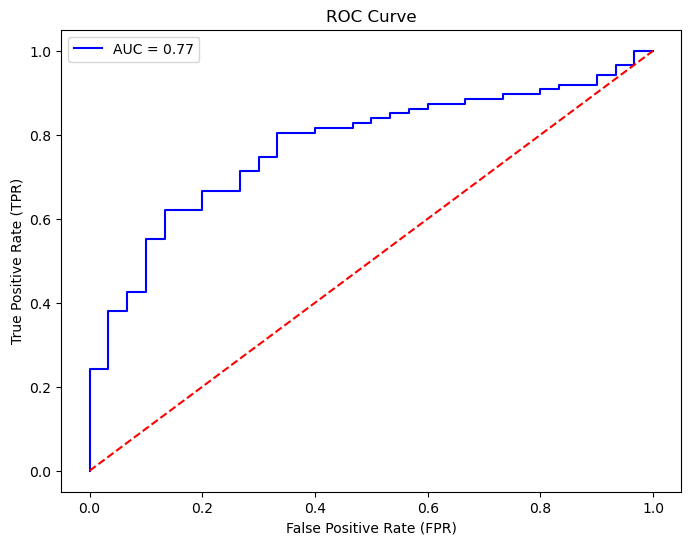

In [140]:
# importing auc and ruc from sklearn library
from sklearn.metrics import roc_curve, auc

# Predicting the probabilities for the positive class
y_probs_new = model_new.predict_proba(x_test)[:, 1]  

# Computing ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_new) #false positive rate, true positive rate
roc_auc = auc(fpr, tpr)

# Printing AUC score
print(f"AUC Score: {roc_auc:.3f}")

# Plot of ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

### `Since the AUC Score is 0.774 and the ROC curve is above the random classifier line, we can conclude:`
- The model performs better than random guessing (AUC = 0.5) and has moderate predictive power.
- AUC = 0.774, so the model can correctly distinguish between the classes 77.4% of the time.

## Deicsion trees: Regression and classification

### Let’s try to fit a decision tree for a classification problem and view the same and see how the predictions can be made using the same.


In [46]:
from sklearn.tree import DecisionTreeClassifier

model_dc = DecisionTreeClassifier()
model_dc.fit(x_train,y_train)
prediction1 = model_dc.predict(x_test)
print(f"Accuracy score:{accuracy_score(y_test,prediction1)*100}%")

Accuracy score:71.7948717948718%


### We can print and check the Decision tree.

In [48]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(100,50),dpi = 150)
plot_tree(model_dc)
plt.show()

## Compare the accuracy of logistic regression model and decision tree model you have fitted.


In [51]:
print(f"Accuracy of Logistic Regression model:{accuracy_score(y_test,y_pred_new)*100}%")
print(f"Accuracy of Decision Tree model:{accuracy_score(y_test,prediction1)*100}%")


Accuracy of Logistic Regression model:74.35897435897436%
Accuracy of Decision Tree model:71.7948717948718%


## Now use the Book1.csv file we used in multiple regression fitting in Labsheet 3.

In [64]:
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp6\Book1.csv")
df

price  area  bedrooms  bathrooms  stories  parking furnishingstatus
0    13300000  7420         4          2        3        2        furnished
1    12250000  8960         4          4        4        3        furnished
2    12250000  9960         3          2        2        2   semi-furnished
3    12215000  7500         4          2        2        3        furnished
4    11410000  7420         4          1        2        2        furnished
..        ...   ...       ...        ...      ...      ...              ...
244   4550000  5320         3          1        2        0   semi-furnished
245   4550000  5360         3          1        2        2      unfurnished
246   4550000  3520         3          1        1        0   semi-furnished
247   4550000  8400         4          1        4        3      unfurnished
248   4543000  4100         2          2        1        0   semi-furnished

[249 rows x 7 columns]

### Do the necessary preprocessing of the data and train test split of the data and fit a multiple regression model and compute the error.

In [67]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    118
furnished          81
unfurnished        50
Name: count, dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(df['furnishingstatus'])
df.drop(['furnishingstatus'],axis = 1)
df['furnishingstatus'] = encoded
df


price  area  bedrooms  bathrooms  stories  parking  furnishingstatus
0    13300000  7420         4          2        3        2                 0
1    12250000  8960         4          4        4        3                 0
2    12250000  9960         3          2        2        2                 1
3    12215000  7500         4          2        2        3                 0
4    11410000  7420         4          1        2        2                 0
..        ...   ...       ...        ...      ...      ...               ...
244   4550000  5320         3          1        2        0                 1
245   4550000  5360         3          1        2        2                 2
246   4550000  3520         3          1        1        0                 1
247   4550000  8400         4          1        4        3                 2
248   4543000  4100         2          2        1        0                 1

[249 rows x 7 columns]

In [71]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

In [73]:
x = X[:,1:]
y = X[:,0]

### Train test split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Now use the DecisionTreeRegressor class to fit a decision tree model and check the decision tree and errors

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
model_dr = DecisionTreeRegressor()
model_dr.fit(x_train,y_train)
y_pred = model_dr.predict(x_test)
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

Mean squared error: 0.08045736392500709
R2 score: -1.4188157472455352


## Now plot the decision tree as done in the classifier case above.

In [82]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(100,50),dpi = 150)
plot_tree(model_dr)
plt.show()

## Checking the result using Multiple linear regression model

In [84]:
from sklearn.linear_model import LinearRegression
multi_model = LinearRegression()
multi_model.fit(x_train,y_train)
y_pred2 = multi_model.predict(x_test)

print("Mean squared error:",mean_squared_error(y_test,y_pred2))
print("R2 score:",r2_score(y_test,y_pred2))

Mean squared error: 0.02232453286305896
R2 score: 0.3288503499891082


## Further also compare the errors you received in both the case and print and compare them.

In [86]:
print("Mean squared error(Decision Tree Regressor):",mean_squared_error(y_test,y_pred))
print("Mean squared error(Multiple linear regression):",mean_squared_error(y_test,y_pred2))

Mean squared error(Decision Tree Regressor): 0.08045736392500709
Mean squared error(Multiple linear regression): 0.02232453286305896


## Using cross validation and hyper parameter tuning in Decision Tree

In [90]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
data = pd.read_csv(r'D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp6\liver_patient.csv')
data.drop('Gender', axis=1, inplace=True)
scaler = MinMaxScaler()
x = scaler.fit_transform(data)
X = x[:, 0:9]
Y = x[:, 9]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
param_grid = {
 'max_depth': [1,3, 5,6,8, 10],
 'min_samples_leaf': [1, 5, 10, 20]
}
dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", grid_search.best_score_)
print("Test Accuracy:", accuracy)


Best Parameters: {'max_depth': 1, 'min_samples_leaf': 1}
Best Cross-validation Accuracy: 0.7060169297643561
Test Accuracy: 0.7435897435897436
